# Investigation of the reliability of borrowers

The customer is the credit department of the bank. It is necessary to understand whether the marital status and the number of children of the client affect the fact of repayment of the loan on time. Input data from the bank — statistics on the solvency of customers.

The results of the study will be taken into account when building a credit scoring model — a special system that evaluates the ability of a potential borrower to repay a loan to a bank.

We will also answer the following questions:

* Is there a relationship between the number of children and credit repayment on time?
* Is there a relationship between marital status and loan repayment on time?
* Is there a relationship between income level and credit repayment on time?
* How do different loan goals affect its repayment on time?

## Step 1. Data Overview

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('datasets/data.csv')
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


In [3]:
data.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,1.935100e+04
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,1.674223e+05
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,1.029716e+05
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,2.066726e+04
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,1.030532e+05
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,1.450179e+05
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,2.034351e+05
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,2.265604e+06


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


**According to the data documentation:**

* `children` — the number of children in the family;
* `days_employed` — total work experience in days;
* `dob_years` — client's age in years;
* `education` — the level of education of the client;
* `education_id` — identifier of the level of education;
* `family_status` — marital status;
* `family_status_id` — id of marital status;
* `gender` — the gender of the client;
* `income_type` — type of employment;
* `debt` — whether there was a debt on repayment of loans;
* `total_income` — monthly income;
* `purpose` — the purpose of obtaining a loan.

### Conclusion

The data file contains 12 columns (5 integer columns, 5 floating point columns and 5 objects) and 21525 rows of data.

At first sight, the column names look appropriate and do not contain any flaws.

The days_employed and total_income columns contain missing values. Moreover, their number is the same, perhaps this is important, it will need to be paid attention to when preprocessing data.

## Step 2. Data Preprocessing

### Filling the gaps

In [5]:
days_employed_NaN = data[data['days_employed'].isna()].shape[0]
total_income_NaN = data[data['total_income'].isna()].shape[0]

In [6]:
print(f'Missing rows in the days_employed: {days_employed_NaN}')
print(f'Missing rows in the total_income: {total_income_NaN}')
print(f'Percentage of missing values: {days_employed_NaN/data.shape[0]:0.0%}')
display(data[data['days_employed'].isna()].head(5))
display(data[data['total_income'].isna()].head(5))

Missing rows in the days_employed: 2174
Missing rows in the total_income: 2174
Percentage of missing values: 10%


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
41,0,NaN,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,NaN,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
41,0,NaN,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,NaN,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу


Missing data was found in the days_employed and total_income columns, the percentage of missing values is about **10%**, which can significantly affect the result of the data research.

It is possible that omissions in the data arose due to the human factor, or due to some technical failure, since omissions are in both columns in the same lines.

We replace omissions with **median values**, because the median value is less sensitive to emissions than the arithmetic mean.

In [7]:
data['days_employed'] = data['days_employed'].fillna(data['days_employed'].median())
data['total_income'] = data['total_income'].fillna(data['total_income'].median())

days_employed_NaN = data[data['days_employed'].isna()].shape[0]
total_income_NaN = data[data['total_income'].isna()].shape[0]

In [8]:
print(f'Missing rows in the days_employed: {days_employed_NaN}')
print(f'Missing rows in the total_income: {total_income_NaN}')
print(f'Percentage of missing values: {days_employed_NaN/data.shape[0]:0.0%}')
print()
data.info()

Missing rows in the days_employed: 0
Missing rows in the total_income: 0
Percentage of missing values: 0%

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     21525 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      21525 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


### Check data for anomalies and corrections.

**Negative** values found in column `days_employed` (18080 rows).

In [9]:
data[data['days_employed']<0]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
...,...,...,...,...,...,...,...,...,...,...,...,...
21519,1,-2351.431934,37,ученая степень,4,в разводе,3,M,сотрудник,0,115949.039788,покупка коммерческой недвижимости
21520,1,-4529.316663,43,среднее,1,гражданский брак,1,F,компаньон,0,224791.862382,операции с жильем
21522,1,-2113.346888,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672.561153,недвижимость
21523,3,-3112.481705,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093.050500,на покупку своего автомобиля


In [10]:
# Corrections of records with negative values
data.loc[data['days_employed'] < 0, 'days_employed'] = data[data['days_employed'] < 0]['days_employed'] * -1

Negative values in the `days_employed` column may have been caused by an error in the seniority calculation.

**Negative** values found in column `children` (47 rows).

In [11]:
data['children'].value_counts()

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

In [12]:
# Corrections of records with negative values
data['children']=data['children'].replace(to_replace=-1, value=1)

In [13]:
data['children'].value_counts()

0     14149
1      4865
2      2055
3       330
20       76
4        41
5         9
Name: children, dtype: int64

In the `children` column there were negative values (-1), they were replaced with positive ones.

In the `children` column, the value **"20"** was found 76 times, indicating an error in the data. Probably, "0" was added by mistake, so the data was replaced with the value - **"2"**

In [14]:
data['children']=data['children'].replace(to_replace=20, value=2)

In [15]:
data['children'].value_counts()

0    14149
1     4865
2     2131
3      330
4       41
5        9
Name: children, dtype: int64

In [16]:
data['gender'].value_counts()

F      14236
M       7288
XNA        1
Name: gender, dtype: int64

There is also one empty cell in the `gender` column, perhaps someone forgot to specify a field. This will not greatly affect the evaluation of the data.

### Change data types

In [17]:
data['total_income']=data['total_income'].astype(int)
data['days_employed']=data['days_employed'].astype(int)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   children          21525 non-null  int64 
 1   days_employed     21525 non-null  int32 
 2   dob_years         21525 non-null  int64 
 3   education         21525 non-null  object
 4   education_id      21525 non-null  int64 
 5   family_status     21525 non-null  object
 6   family_status_id  21525 non-null  int64 
 7   gender            21525 non-null  object
 8   income_type       21525 non-null  object
 9   debt              21525 non-null  int64 
 10  total_income      21525 non-null  int32 
 11  purpose           21525 non-null  object
dtypes: int32(2), int64(5), object(5)
memory usage: 1.8+ MB


### Processing duplicates

In [19]:
data[data.duplicated()].count()

children            54
days_employed       54
dob_years           54
education           54
education_id        54
family_status       54
family_status_id    54
gender              54
income_type         54
debt                54
total_income        54
purpose             54
dtype: int64

In [20]:
data=data.drop_duplicates().reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21471 entries, 0 to 21470
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   children          21471 non-null  int64 
 1   days_employed     21471 non-null  int32 
 2   dob_years         21471 non-null  int64 
 3   education         21471 non-null  object
 4   education_id      21471 non-null  int64 
 5   family_status     21471 non-null  object
 6   family_status_id  21471 non-null  int64 
 7   gender            21471 non-null  object
 8   income_type       21471 non-null  object
 9   debt              21471 non-null  int64 
 10  total_income      21471 non-null  int32 
 11  purpose           21471 non-null  object
dtypes: int32(2), int64(5), object(5)
memory usage: 1.8+ MB


Obvious duplicates were removed using the **drop_duplicates + reset_index** combination. Obvious duplicates appeared due to accidental data duplication.

In [21]:
data['education'].value_counts()

среднее                13705
высшее                  4710
СРЕДНЕЕ                  772
Среднее                  711
неоконченное высшее      668
ВЫСШЕЕ                   273
Высшее                   268
начальное                250
Неоконченное высшее       47
НЕОКОНЧЕННОЕ ВЫСШЕЕ       29
НАЧАЛЬНОЕ                 17
Начальное                 15
ученая степень             4
Ученая степень             1
УЧЕНАЯ СТЕПЕНЬ             1
Name: education, dtype: int64

In [22]:
data['education'] = data['education'].str.lower()
data['education'].value_counts()

среднее                15188
высшее                  5251
неоконченное высшее      744
начальное                282
ученая степень             6
Name: education, dtype: int64

Information in the `education` column is assigned to a **single register**.

In [23]:
data['family_status'].value_counts()

женат / замужем          12344
гражданский брак          4163
Не женат / не замужем     2810
в разводе                 1195
вдовец / вдова             959
Name: family_status, dtype: int64

In [24]:
data['income_type'].value_counts()

сотрудник          11091
компаньон           5080
пенсионер           3837
госслужащий         1457
безработный            2
предприниматель        2
студент                1
в декрете              1
Name: income_type, dtype: int64

No other implicit duplicates were detected (except for the `purpose` column, which will be processed later).

### Creation of additional dictionary dataframes, decomposition of the original dataframe.

In [25]:
dic_1 = data[['education','education_id']]
dic_1 = dic_1.groupby('education').mean()
dic_1

,education_id
education,
высшее,0.0
начальное,3.0
неоконченное высшее,2.0
среднее,1.0
ученая степень,4.0


In [26]:
dic_2 = data[['family_status', 'family_status_id']]
dic_2 = dic_2.groupby('family_status').mean()
dic_2

,family_status_id
family_status,
Не женат / не замужем,4.0
в разводе,3.0
вдовец / вдова,2.0
гражданский брак,1.0
женат / замужем,0.0


In [27]:
data = data.drop(['education','family_status'], axis=1)
data.head(5)

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437,42,0,0,F,сотрудник,0,253875,покупка жилья
1,1,4024,36,1,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,5623,33,1,0,M,сотрудник,0,145885,покупка жилья
3,3,4124,32,1,0,M,сотрудник,0,267628,дополнительное образование
4,0,340266,53,1,1,F,пенсионер,0,158616,сыграть свадьбу


### Income categorization.

Creating the `income_estimation()` function for income categorization

In [28]:
def income_estimation(income):
    if 0 <= income <= 30000:
        return 'E'
    elif 30001 <= income <= 50000:
        return 'D'
    elif 50001 <= income <= 200000:
        return 'C'
    elif 200001 <= income <= 1000000:
        return 'B'
    elif income >= 1000001:
        return 'A'
    else:
        return 'Negative value!'

In [29]:
data['total_income_category'] = data['total_income'].apply(income_estimation)
data['total_income_category'].value_counts()

C    16033
B     5041
D      350
A       25
E       22
Name: total_income_category, dtype: int64

The data is divided into 5 categories, depending on the level of income

### Purpose categorization.

In [30]:
data.groupby('purpose')['purpose'].count()

purpose
автомобили                                478
автомобиль                                494
высшее образование                        452
дополнительное образование                460
жилье                                     646
заняться высшим образованием              496
заняться образованием                     408
на покупку автомобиля                     472
на покупку подержанного автомобиля        478
на покупку своего автомобиля              505
на проведение свадьбы                     773
недвижимость                              633
образование                               447
операции с жильем                         652
операции с коммерческой недвижимостью     650
операции с недвижимостью                  675
операции со своей недвижимостью           627
покупка жилой недвижимости                606
покупка жилья                             646
покупка жилья для сдачи                   652
покупка жилья для семьи                   638
покупка коммерческой недви

Let's create the function `purpose_category()`, which will help process the column `purpose` and divide the data into 4 categories:

* car operations;
* real estate transactions;
* wedding;
* education.

In [31]:
def purpose_category(text):
    if 'автомоб' in text:
        return 'car operations'
    elif 'жил' in text or 'недвиж' in text:
        return 'real estate transactions'
    elif 'свадь' in text:
        return 'wedding'
    elif 'образован' in text:
        return 'education'
    else:
        return 'Failed to generalize purpose!'

In [32]:
data['purpose_category'] = data['purpose'].apply(purpose_category)
data['purpose_category'].value_counts()

real estate transactions    10814
car operations               4308
education                    4014
wedding                      2335
Name: purpose_category, dtype: int64

In [33]:
data.head()

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437,42,0,0,F,сотрудник,0,253875,покупка жилья,B,real estate transactions
1,1,4024,36,1,0,F,сотрудник,0,112080,приобретение автомобиля,C,car operations
2,0,5623,33,1,0,M,сотрудник,0,145885,покупка жилья,C,real estate transactions
3,3,4124,32,1,0,M,сотрудник,0,267628,дополнительное образование,B,education
4,0,340266,53,1,1,F,пенсионер,0,158616,сыграть свадьбу,C,wedding


## Step 3. Answers to questions.

### Question 1:

Is there a relationship between the number of children and credit repayment on time?

### Answer 1:

In [34]:
data.groupby('children')['debt'].mean()

children
0    0.075353
1    0.091639
2    0.094925
3    0.081818
4    0.097561
5    0.000000
Name: debt, dtype: float64

<AxesSubplot:xlabel='children', ylabel='mean_debt'>

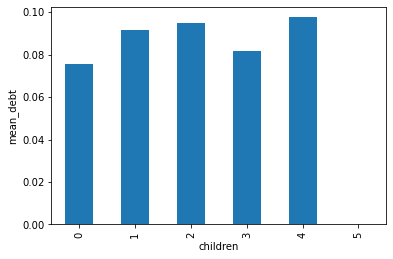

In [35]:
data.groupby('children')['debt'].mean().plot(kind='bar',ylabel='mean_debt')

It is impossible to make an definite conclusion based on these data, there are contradictions. 

There is some tendency: with the increase of children, the number of debts increases, but people with 5 children had no debts at all, and people with 3 children had less debts than people with 1,2 and 4 children.

### Question 2:

Is there a relationship between marital status and loan repayment on time?

### Answer 2:

In [36]:
dic_2.reset_index(inplace=True)
dic_2['family_status_eng'] = ['not married','divorced','widower/widow','civil marriage','married']

In [37]:
dic_2

,family_status,family_status_id,family_status_eng
0,Не женат / не замужем,4.0,not married
1,в разводе,3.0,divorced
2,вдовец / вдова,2.0,widower/widow
3,гражданский брак,1.0,civil marriage
4,женат / замужем,0.0,married


In [38]:
dic_2.merge(data.groupby('family_status_id')['debt'].mean().reset_index(), on='family_status_id')

,family_status,family_status_id,family_status_eng,debt
0,Не женат / не замужем,4.0,not married,0.097509
1,в разводе,3.0,divorced,0.071130
2,вдовец / вдова,2.0,widower/widow,0.065693
3,гражданский брак,1.0,civil marriage,0.093202
4,женат / замужем,0.0,married,0.075421


<AxesSubplot:xlabel='family_status_eng', ylabel='mean_debt'>

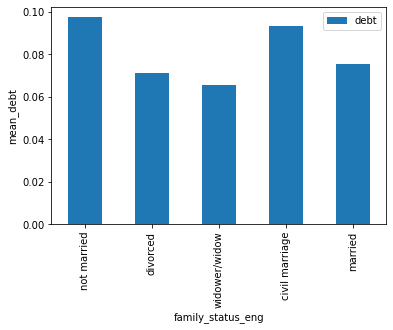

In [39]:
dic_2.merge(data.groupby('family_status_id')['debt'].mean().reset_index(), on='family_status_id').plot(kind='bar',x='family_status_eng',y='debt', ylabel='mean_debt')

It can be said that **widows/widowers** were the least likely to have debts on loans, and those who were **not married** and who were in a **civil marriage** had the most debts.

### Question 3:

Is there a relationship between income level and credit repayment on time?

### Answer 3:

In [40]:
data.groupby('total_income_category')['debt'].mean()

total_income_category
A    0.080000
B    0.070621
C    0.084825
D    0.060000
E    0.090909
Name: debt, dtype: float64

<AxesSubplot:xlabel='total_income_category', ylabel='mean_debt'>

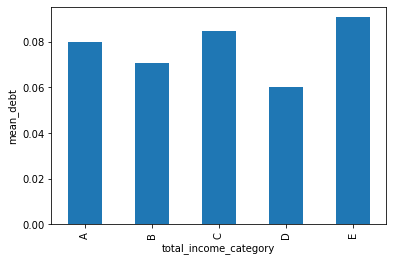

In [41]:
data.groupby('total_income_category')['debt'].mean().plot(kind='bar',ylabel='mean_debt')

There is no definite correlation particularly between these two parameters for this selection. 

We can say that **group D had the least of all debts, and group E had the most**

### Question 4:

How do different loan goals affect its repayment on time?

### Answer 4:

In [42]:
data.groupby('purpose_category')['debt'].mean()

purpose_category
car operations              0.093547
education                   0.092177
real estate transactions    0.072314
wedding                     0.079657
Name: debt, dtype: float64

<AxesSubplot:xlabel='purpose_category', ylabel='mean_debt'>

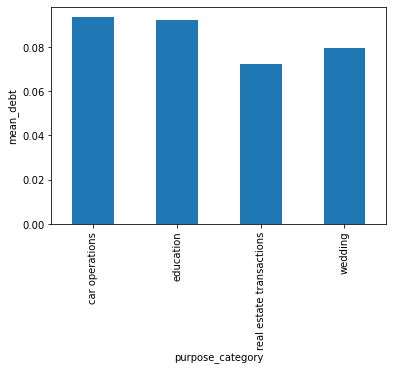

In [43]:
data.groupby('purpose_category')['debt'].mean().plot(kind='bar', ylabel='mean_debt')

It can be concluded that people who took out loans for **real estate and for a wedding - had debts less often than other groups**.

## General conclusion:

Summing up, we can say that the client who is least likely to have a loan debt is a **married/divorced/widowed, preferably with an income level above category E, taking a loan preferably for real estate or a wedding**